In [1]:
from collections import deque
import time
import memory_profiler
import matplotlib.pyplot as plt
import networkx as nx

def plot_graph(graph, title="Grafo"):
    # Crear el grafo
    G = nx.Graph()

    # Añadir aristas
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    # Configuración del gráfico
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)  # Posiciones fijas para consistencia
    nx.draw(
        G, pos,
        with_labels=True,
        node_color='skyblue',
        node_size=700,
        font_size=10,
        font_weight='bold',
        edge_color='gray'
    )
    plt.title(title, fontsize=14)
    plt.show()

# Ejemplo de uso:
metro_graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B', 'G'],
    'E': ['B', 'H', 'I'],
    'F': ['C', 'J'],
    'G': ['D'],
    'H': ['E'],
    'I': ['E', 'J'],
    'J': ['F', 'I']
}

# Clase para representar un nodo en el grafo
class Node:
    def __init__(self, state, parent=None, action=None):
        self.state = state      # Estación actual (ej: 'A')
        self.parent = parent    # Nodo padre (Node)
        self.action = action    # Acción que llevó a este nodo (ej: 'B' si viene de A -> B)

    def __repr__(self):
        return f"Node({self.state})"

# Clase para definir el problema de búsqueda
class Problem:
    def __init__(self, initial, goal, graph):
        self.initial = initial  # Estado inicial (ej: 'A')
        self.goal = goal        # Estado objetivo (ej: 'J')
        self.graph = graph      # Grafo de conexiones

    def actions(self, state):
        return self.graph[state]  # Devuelve las estaciones conectadas

    def result(self, state, action):
        return action  # El nuevo estado es la estación a la que se mueve

# Función para generar un nodo hijo
def child_node(problem, parent, action):
    return Node(
        state=problem.result(parent.state, action),
        parent=parent,
        action=action
    )

In [2]:
def bfs(problem):
    node = Node(problem.initial)
    if node.state == problem.goal:
        return solution(node)
    
    frontier = deque([node])  # Cola FIFO
    explored = set()
    
    while frontier:
        node = frontier.popleft()
        explored.add(node.state)
        
        for action in problem.actions(node.state):
            child = child_node(problem, node, action)
            if child.state not in explored and child not in frontier:
                if child.state == problem.goal:
                    return solution(child)
                frontier.append(child)
    return None

# Función para reconstruir el camino desde el nodo final
def solution(node):
    path = []
    while node:
        path.append(node.state)
        node = node.parent
    return path[::-1]  # Invertir para obtener el camino desde inicio hasta fin

In [3]:
def ids(problem, max_depth=10):
    for depth in range(max_depth):
        result = dls(problem, depth)
        if result != 'cutoff':
            return result
    return None

def dls(problem, limit):
    return recursive_dls(Node(problem.initial), problem, limit)

def recursive_dls(node, problem, limit):
    if node.state == problem.goal:
        return solution(node)
    elif limit == 0:
        return 'cutoff'
    else:
        cutoff_occurred = False
        for action in problem.actions(node.state):
            child = child_node(problem, node, action)
            result = recursive_dls(child, problem, limit - 1)
            if result == 'cutoff':
                cutoff_occurred = True
            elif result is not None:
                return result
        return 'cutoff' if cutoff_occurred else None

=== BFS (Breadth-First Search) ===
Camino encontrado: ['A', 'C', 'F', 'J']
Tiempo de ejecución: 0.101077 segundos
Memoria utilizada: 0.000000 MiB

=== IDS (Iterative Deepening Search) ===
Camino encontrado: ['A', 'C', 'F', 'J']
Tiempo de ejecución: 0.101021 segundos
Memoria utilizada: 0.000000 MiB


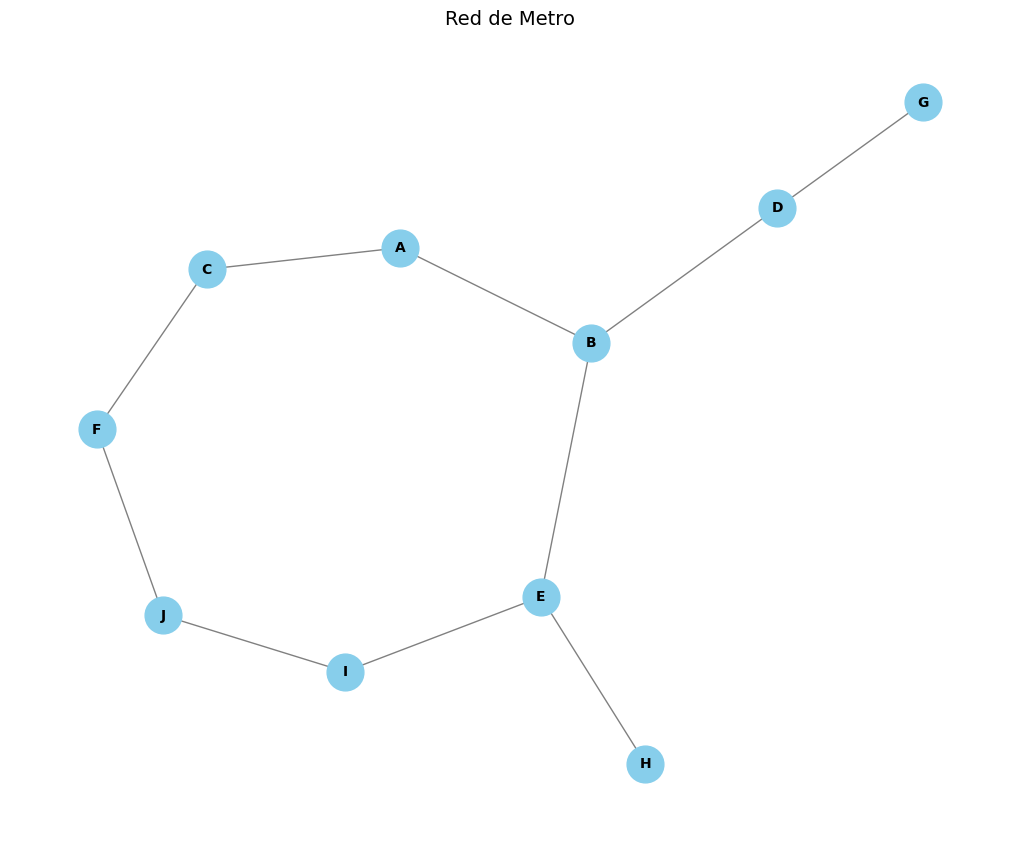

In [4]:
# Definir el problema (A -> J)
problem = Problem('A', 'J', metro_graph)

# Medición de BFS
print("=== BFS (Breadth-First Search) ===")
start_time = time.time()
bfs_mem = memory_profiler.memory_usage()[0]
bfs_path = bfs(problem)
bfs_time = time.time() - start_time
bfs_mem = memory_profiler.memory_usage()[0] - bfs_mem

print(f"Camino encontrado: {bfs_path}")
print(f"Tiempo de ejecución: {bfs_time:.6f} segundos")
print(f"Memoria utilizada: {bfs_mem:.6f} MiB")

# Medición de IDS
print("\n=== IDS (Iterative Deepening Search) ===")
start_time = time.time()
ids_mem = memory_profiler.memory_usage()[0]
ids_path = ids(problem)
ids_time = time.time() - start_time
ids_mem = memory_profiler.memory_usage()[0] - ids_mem

print(f"Camino encontrado: {ids_path}")
print(f"Tiempo de ejecución: {ids_time:.6f} segundos")
print(f"Memoria utilizada: {ids_mem:.6f} MiB")

plot_graph(metro_graph, "Red de Metro")